In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import CyclicLR, StepLR
from tqdm import tqdm

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(self, Net).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        
    def forward(self, data):
        res = []
        for i in range(2):
            x = data[i]
            x = self.conv1(x)
            x = F.relu(x)
            x = self.conv2(x)
            x = F.max_pool2d(x, 2)
            x = self.dropout1(x)
            x = torch.flatten(x, 1)
            x = self.fc1(x)
            res.append(x)
        res = (1/2)*(F.kl_div(res[0], (res[0]+res[1])/2)) + \
        (1/2)*(F.kl_div(res[1], (res[0]+res[1])/2))
        return res

In [8]:
train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                       ])),
        batch_size=64, shuffle=True)

In [13]:
a, b = iter(train_loader).next()

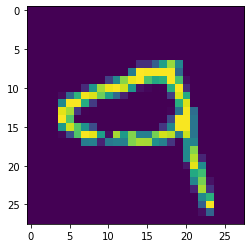

In [20]:
plt.imshow(a[63].numpy().squeeze());

In [21]:
b

tensor([1, 0, 5, 2, 0, 9, 9, 6, 0, 2, 7, 2, 3, 0, 0, 2, 5, 6, 2, 8, 5, 5, 9, 2,
        9, 2, 0, 7, 3, 5, 9, 3, 4, 5, 0, 9, 5, 0, 7, 9, 2, 8, 1, 0, 4, 1, 6, 3,
        2, 3, 9, 0, 4, 3, 8, 3, 4, 9, 3, 8, 9, 9, 7, 9])

In [23]:
a.shape

torch.Size([64, 1, 28, 28])

In [ ]:
class DataPair(torch.utils.data.Dataset):
    